In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
from matplotlib import pyplot as plt 
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

In [2]:
# Load the dataset
df = pd.read_csv('laptop_data.csv')
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [3]:
df.shape

(1303, 12)

In [4]:
df.isna().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
# drop the unnamed col 
df.drop(columns = ['Unnamed: 0'] , axis = 1 , inplace = True)

In [7]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [8]:
df.describe()

,Inches,Price
count,1303.000000,1303.000000
mean,15.017191,59870.042910
std,1.426304,37243.201786
min,10.100000,9270.720000
25%,14.000000,31914.720000
50%,15.600000,52054.560000
75%,15.600000,79274.246400
max,18.400000,324954.720000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price             1303 non-null   float64
dtypes: float64(2), object(9)
memory usage: 112.1+ KB


In [10]:
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

print(f"Total numerical features: {len(numerical_features)} and they are: {numerical_features} \n")
print(f"Total categorical features: {len(categorical_features)} and they are: {categorical_features}")

Total numerical features: 2 and they are: ['Inches', 'Price'] 

Total categorical features: 9 and they are: ['Company', 'TypeName', 'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight']


- Weight is in object form, it should be in numerical values.

In [11]:
# proportion of count data on ccategorical_features
for col in categorical_features: 
    print(df[col].value_counts(normalize = True) * 100)
    print(' - ' * 30)

Company
Dell         22.793553
Lenovo       22.793553
HP           21.028396
Asus         12.125863
Acer          7.904835
MSI           4.144282
Toshiba       3.683807
Apple         1.611665
Samsung       0.690714
Razer         0.537222
Mediacom      0.537222
Microsoft     0.460476
Xiaomi        0.306984
Vero          0.306984
Chuwi         0.230238
Google        0.230238
Fujitsu       0.230238
LG            0.230238
Huawei        0.153492
Name: proportion, dtype: float64
 -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  - 
TypeName
Notebook              55.794321
Gaming                15.732924
Ultrabook             15.042210
2 in 1 Convertible     9.286262
Workstation            2.225633
Netbook                1.918649
Name: proportion, dtype: float64
 -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  - 
ScreenResolution
Full HD 1920x1080                                38.910207
1366x768                      

# let's check all columns one by one

## Company

In [12]:
df['Company'].value_counts()

Company
Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: count, dtype: int64

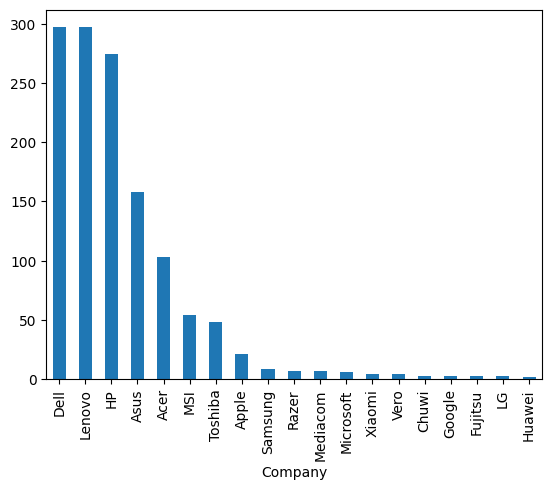

In [13]:
df['Company'].value_counts().plot(kind = 'bar')
plt.show()

- Company after Samsung, the count of laptops are very low.
- Possibly we can take till Samsung and remove others. 

In [14]:
df.columns

Index(['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu', 'Ram',
       'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')

## TypeName

In [15]:
df['TypeName'].value_counts(normalize = True)

TypeName
Notebook              0.557943
Gaming                0.157329
Ultrabook             0.150422
2 in 1 Convertible    0.092863
Workstation           0.022256
Netbook               0.019186
Name: proportion, dtype: float64

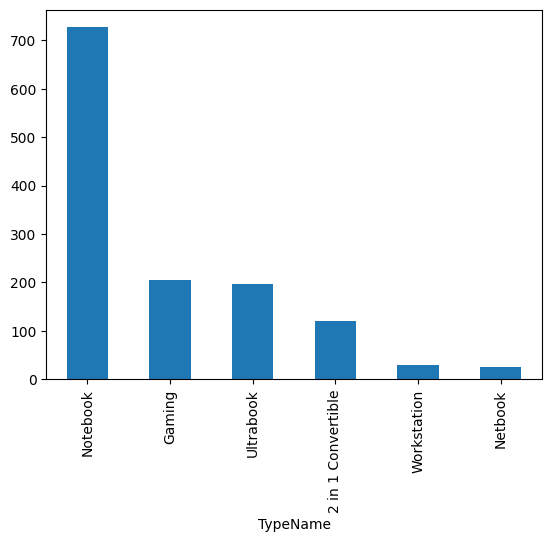

In [16]:
df['TypeName'].value_counts().plot(kind = 'bar')
plt.show()

In [17]:
df['TypeName'].value_counts()

TypeName
Notebook              727
Gaming                205
Ultrabook             196
2 in 1 Convertible    121
Workstation            29
Netbook                25
Name: count, dtype: int64

## Inches

In [18]:
df['Inches']

0       13.3
1       13.3
2       15.6
3       15.4
4       13.3
        ... 
1298    14.0
1299    13.3
1300    14.0
1301    15.6
1302    15.6
Name: Inches, Length: 1303, dtype: float64

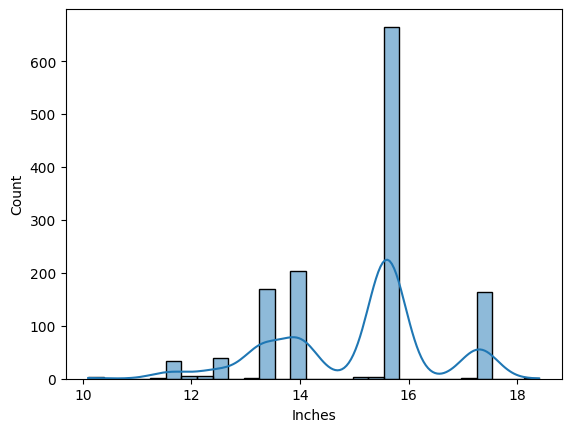

In [19]:
sns.histplot(df['Inches'] , kde = True) 
plt.show()

In [20]:
df['Inches'].value_counts()

Inches
15.6    665
14.0    197
13.3    164
17.3    164
12.5     39
11.6     33
12.0      6
13.5      6
13.9      6
12.3      5
10.1      4
15.4      4
15.0      4
13.0      2
18.4      1
17.0      1
14.1      1
11.3      1
Name: count, dtype: int64

- It is not a proper continous values which is normal.
- But some sizes there are very few laptops

In [21]:
df['ScreenResolution']

0               IPS Panel Retina Display 2560x1600
1                                         1440x900
2                                Full HD 1920x1080
3               IPS Panel Retina Display 2880x1800
4               IPS Panel Retina Display 2560x1600
                           ...                    
1298     IPS Panel Full HD / Touchscreen 1920x1080
1299    IPS Panel Quad HD+ / Touchscreen 3200x1800
1300                                      1366x768
1301                                      1366x768
1302                                      1366x768
Name: ScreenResolution, Length: 1303, dtype: object

### we can make few feature from here like:
- Display type: ips or other
- HD or not
- Touchscreeen or not
- Resolution

In [22]:
df['Cpu']

0                       Intel Core i5 2.3GHz
1                       Intel Core i5 1.8GHz
2                 Intel Core i5 7200U 2.5GHz
3                       Intel Core i7 2.7GHz
4                       Intel Core i5 3.1GHz
                        ...                 
1298              Intel Core i7 6500U 2.5GHz
1299              Intel Core i7 6500U 2.5GHz
1300    Intel Celeron Dual Core N3050 1.6GHz
1301              Intel Core i7 6500U 2.5GHz
1302    Intel Celeron Dual Core N3050 1.6GHz
Name: Cpu, Length: 1303, dtype: object

### Again a useful column
- cpu brand name
- which core
- clock speed(GHz)
- model number
- CPU generation
- SKU model(7200 , 6500 , N3050)

In [23]:
df.columns

Index(['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu', 'Ram',
       'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')

## Ram

In [24]:
df['Ram']

0        8GB
1        8GB
2        8GB
3       16GB
4        8GB
        ... 
1298     4GB
1299    16GB
1300     2GB
1301     6GB
1302     4GB
Name: Ram, Length: 1303, dtype: object

In [25]:
df['Ram'].value_counts()

Ram
8GB     619
4GB     375
16GB    200
6GB      41
12GB     25
2GB      22
32GB     17
24GB      3
64GB      1
Name: count, dtype: int64

- There is GB suffix which need to remove

In [26]:
df['Ram'] = df['Ram'].str.replace("GB" , "")

In [27]:
df['Ram'] = df['Ram'].astype(int)

In [28]:
df['Ram'].value_counts()

Ram
8     619
4     375
16    200
6      41
12     25
2      22
32     17
24      3
64      1
Name: count, dtype: int64

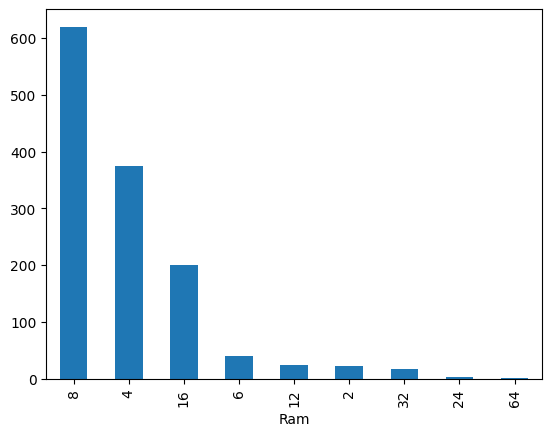

In [29]:
df['Ram'].value_counts().plot(kind = 'bar')
plt.show()

## Memory

In [30]:
df['Memory'].value_counts()

Memory
256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD         

In [32]:
df[df['Memory'].str.contains("Flash")]

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
6,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.2GHz,16,256GB Flash Storage,Intel Iris Pro Graphics,Mac OS X,2.04kg,114017.6016
7,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,256GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,61735.5360
20,Asus,Netbook,11.6,1366x768,Intel Atom x5-Z8350 1.44GHz,2,32GB Flash Storage,Intel HD Graphics 400,Windows 10,0.98kg,10224.4320
26,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.6GHz,8,128GB Flash Storage,Intel HD Graphics 6000,Mac OS X,1.35kg,58554.7200
...,...,...,...,...,...,...,...,...,...,...,...
1272,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200
1282,HP,Netbook,11.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,2,32GB Flash Storage,Intel HD Graphics 400,Windows 10,1.17kg,11135.5200
1286,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200
1296,HP,Netbook,11.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,2,32GB Flash Storage,Intel HD Graphics 400,Windows 10,1.17kg,11135.5200


In [33]:
df[df['Memory'].str.contains("Hybrid")]

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
151,Dell,Gaming,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8,1.0TB Hybrid,Nvidia GeForce GTX 1050,Windows 10,2.62kg,47898.7200
976,Lenovo,Notebook,14.0,1366x768,Intel Core i5 6200U 2.3GHz,4,508GB Hybrid,Intel HD Graphics 520,Windows 7,1.70kg,53386.5600
1010,Dell,Gaming,15.6,Full HD 1920x1080,Intel Core i5 7300HQ 2.5GHz,8,1.0TB Hybrid,Nvidia GeForce GTX 1050,Windows 10,2.65kg,50562.7200
1081,Lenovo,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 6820HK 2.7GHz,32,512GB SSD + 1.0TB Hybrid,Nvidia GeForce GTX 980M,Windows 10,4.6kg,172627.2000
1116,Lenovo,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 6820HK 2.7GHz,16,256GB SSD + 1.0TB Hybrid,Nvidia GeForce GTX 980M,Windows 10,4.6kg,146519.4672
1135,Lenovo,Notebook,15.6,Full HD 1920x1080,Intel Core i7 6500U 2.5GHz,16,1.0TB Hybrid,AMD Radeon R7 M360,Windows 10,2.5kg,58554.7200
1158,Lenovo,Notebook,15.6,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,8,1.0TB Hybrid,AMD Radeon R5 M330,Windows 10,2.5kg,42010.7472
1176,Lenovo,Notebook,15.6,Full HD 1920x1080,Intel Core i7 6500U 2.5GHz,4,1.0TB Hybrid,Intel HD Graphics 520,Windows 7,2.32kg,43956.0000
1258,Lenovo,Notebook,15.6,Full HD 1920x1080,Intel Core i7 6500U 2.5GHz,8,1.0TB Hybrid,AMD Radeon R5 M330,Windows 7,2.32kg,47685.6000
1266,HP,Notebook,15.6,Full HD 1920x1080,AMD A9-Series 9410 2.9GHz,6,1.0TB Hybrid,AMD Radeon R7 M440,Windows 10,2.04kg,29303.4672


In [34]:
df[df['Memory'].str.contains("Hybrid")].shape

(12, 11)

In [35]:
df['Memory'].unique()

array(['128GB SSD', '128GB Flash Storage', '256GB SSD', '512GB SSD',
       '500GB HDD', '256GB Flash Storage', '1TB HDD',
       '32GB Flash Storage', '128GB SSD +  1TB HDD',
       '256GB SSD +  256GB SSD', '64GB Flash Storage',
       '256GB SSD +  1TB HDD', '256GB SSD +  2TB HDD', '32GB SSD',
       '2TB HDD', '64GB SSD', '1.0TB Hybrid', '512GB SSD +  1TB HDD',
       '1TB SSD', '256GB SSD +  500GB HDD', '128GB SSD +  2TB HDD',
       '512GB SSD +  512GB SSD', '16GB SSD', '16GB Flash Storage',
       '512GB SSD +  256GB SSD', '512GB SSD +  2TB HDD',
       '64GB Flash Storage +  1TB HDD', '180GB SSD', '1TB HDD +  1TB HDD',
       '32GB HDD', '1TB SSD +  1TB HDD', '512GB Flash Storage',
       '128GB HDD', '240GB SSD', '8GB SSD', '508GB Hybrid', '1.0TB HDD',
       '512GB SSD +  1.0TB Hybrid', '256GB SSD +  1.0TB Hybrid'],
      dtype=object)

### Make new features from memory like:
- HDD
- SSD
- Flash

## Gpu

In [36]:
df['Gpu'].unique()

array(['Intel Iris Plus Graphics 640', 'Intel HD Graphics 6000',
       'Intel HD Graphics 620', 'AMD Radeon Pro 455',
       'Intel Iris Plus Graphics 650', 'AMD Radeon R5',
       'Intel Iris Pro Graphics', 'Nvidia GeForce MX150',
       'Intel UHD Graphics 620', 'Intel HD Graphics 520',
       'AMD Radeon Pro 555', 'AMD Radeon R5 M430',
       'Intel HD Graphics 615', 'AMD Radeon Pro 560',
       'Nvidia GeForce 940MX', 'Intel HD Graphics 400',
       'Nvidia GeForce GTX 1050', 'AMD Radeon R2', 'AMD Radeon 530',
       'Nvidia GeForce 930MX', 'Intel HD Graphics',
       'Intel HD Graphics 500', 'Nvidia GeForce 930MX ',
       'Nvidia GeForce GTX 1060', 'Nvidia GeForce 150MX',
       'Intel Iris Graphics 540', 'AMD Radeon RX 580',
       'Nvidia GeForce 920MX', 'AMD Radeon R4 Graphics', 'AMD Radeon 520',
       'Nvidia GeForce GTX 1070', 'Nvidia GeForce GTX 1050 Ti',
       'Nvidia GeForce MX130', 'AMD R4 Graphics',
       'Nvidia GeForce GTX 940MX', 'AMD Radeon RX 560',
       'Nvid

- Gpu Brand
- Series Type(GTX , RTX m RX)
- Gpu Model Number(1050)
- Gpu performance Tier

In [37]:
df['OpSys'].unique()

array(['macOS', 'No OS', 'Windows 10', 'Mac OS X', 'Linux', 'Android',
       'Windows 10 S', 'Chrome OS', 'Windows 7'], dtype=object)

In [38]:
df[df['OpSys'] == 'No OS']

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
10,HP,Notebook,15.6,1366x768,Intel Core i5 7200U 2.5GHz,4,500GB HDD,Intel HD Graphics 620,No OS,1.86kg,20986.9920
11,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,4,500GB HDD,Intel HD Graphics 520,No OS,1.86kg,18381.0672
18,Lenovo,Notebook,15.6,Full HD 1920x1080,Intel Core i3 7100U 2.4GHz,8,1TB HDD,Nvidia GeForce 940MX,No OS,2.2kg,26586.7200
22,HP,Notebook,15.6,1366x768,AMD E-Series E2-9000e 1.5GHz,4,500GB HDD,AMD Radeon R2,No OS,1.86kg,13746.2400
...,...,...,...,...,...,...,...,...,...,...,...
1174,Lenovo,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,1TB HDD,Nvidia GeForce 940MX,No OS,2.2kg,37775.5200
1196,Lenovo,Notebook,15.6,1366x768,Intel Core i3 6006U 2GHz,4,1TB HDD,AMD Radeon R5 M430,No OS,1.9kg,19607.0400
1201,Lenovo,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,8,500GB HDD,Nvidia GeForce 920MX,No OS,2.2kg,33513.1200
1217,Lenovo,Notebook,17.3,1600x900,Intel Core i5 7200U 2.5GHz,8,1TB HDD,Intel HD Graphics 620,No OS,2.8kg,28717.9200


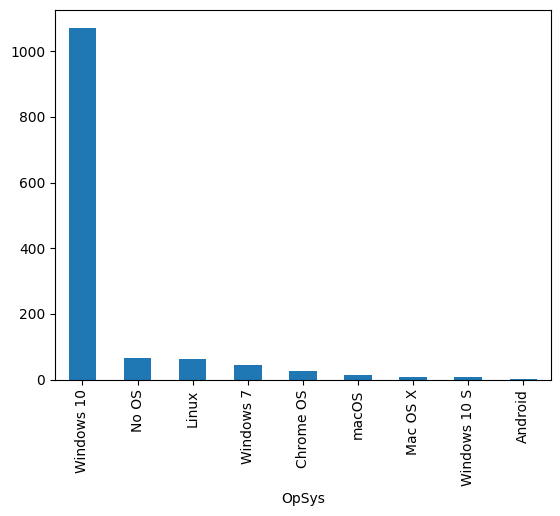

In [39]:
df['OpSys'].value_counts().plot(kind = 'bar')
plt.show()

In [40]:
df['OpSys'].value_counts()

OpSys
Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

- Merge Mac OS X with Mac OS
- Merger Windows 10 S with Windows 10

In [41]:
df['Weight']

0       1.37kg
1       1.34kg
2       1.86kg
3       1.83kg
4       1.37kg
         ...  
1298     1.8kg
1299     1.3kg
1300     1.5kg
1301    2.19kg
1302     2.2kg
Name: Weight, Length: 1303, dtype: object

In [43]:
df['Weight']= df['Weight'].str.replace("kg" , "")

In [45]:
df['Weight'] = df['Weight'].astype(float)

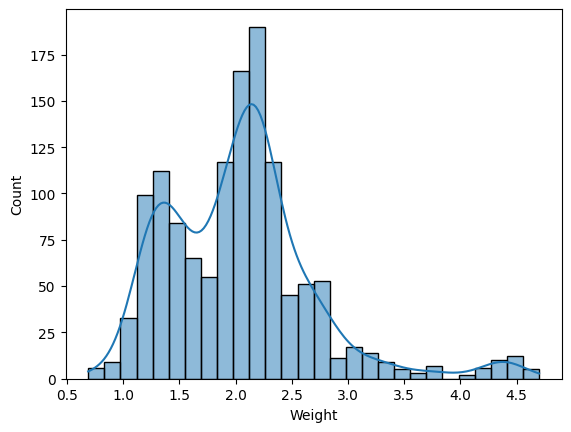

In [46]:
sns.histplot(df['Weight'] , kde = True) 
plt.show()

## Statistical QNA

### 1. Does price varies based on Company

In [49]:
company_price = df.groupby("Company")["Price"].mean().sort_values(ascending = False)

In [50]:
company_price

Company
Razer        178282.491429
LG           111834.720000
MSI           92116.226133
Google        89386.080000
Microsoft     85903.788000
Apple         83340.499886
Huawei        75870.720000
Samsung       75308.320000
Toshiba       67549.050000
Dell          63193.755782
Xiaomi        60390.882000
Asus          58830.143878
Lenovo        57882.563200
HP            56891.044222
Fujitsu       38841.120000
Acer          33394.615969
Chuwi         16745.726400
Mediacom      15717.600000
Vero          11584.404000
Name: Price, dtype: float64

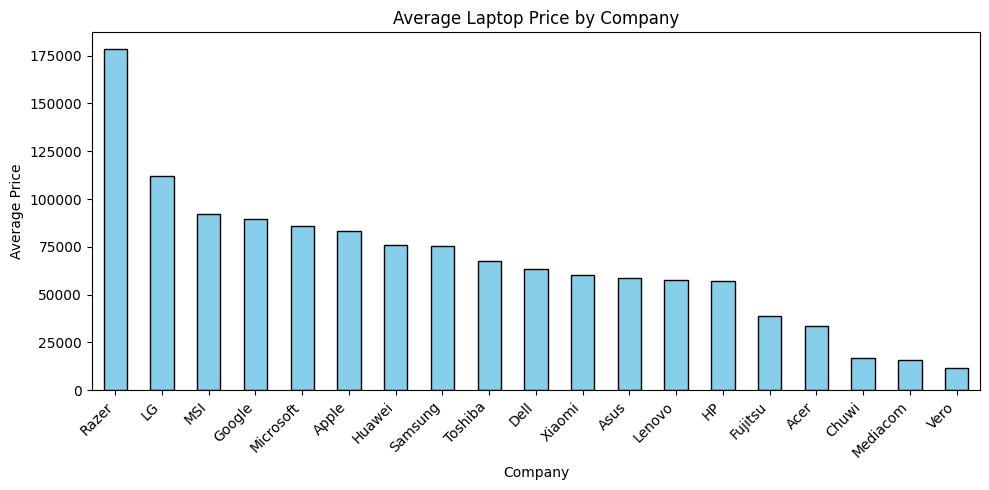

In [51]:
plt.figure(figsize = (10 , 5))
company_price.plot(kind = 'bar', color ='skyblue', edgecolor = 'black')
plt.title("Average Laptop Price by Company")
plt.xlabel("Company")
plt.ylabel("Average Price")
plt.xticks(rotation = 45 , ha = 'right')
plt.tight_layout()
plt.show()

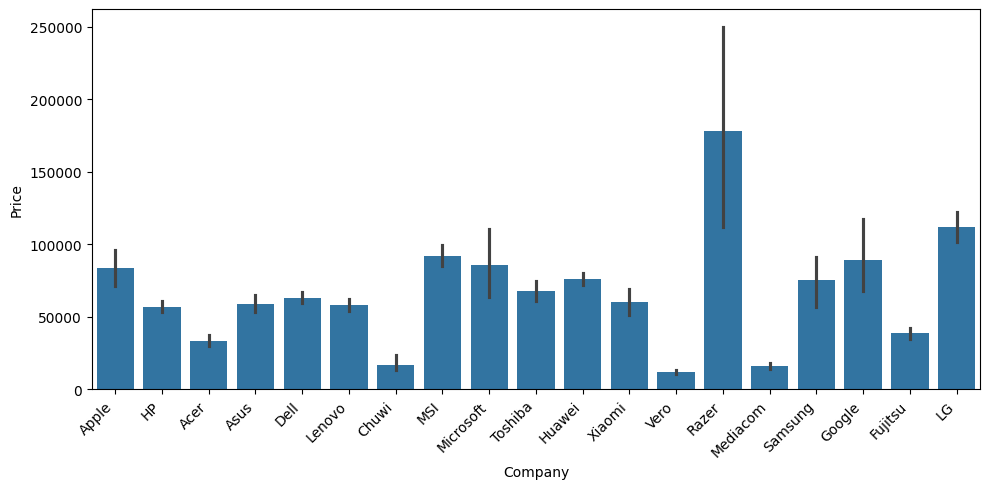

In [52]:
plt.figure(figsize = (10 , 5))
sns.barplot(x = df['Company'] , y = df['Price'])
plt.xticks(rotation = 45 , ha = 'right') 
plt.tight_layout()
plt.show()

In [61]:
# Doing ANOVA test to find significance 
from scipy.stats import f_oneway
groups = [df[df['Company'] == cat]['Price'] for cat in df['Company'].unique()]
f_stat, p_value = f_oneway(*groups)

if p_value < 0.05:
    print("The mean price differs significantly across companies.")
else:
    print("No significant difference in mean price across companies.")

The mean price differs significantly across companies.


- Price varies based on Company.
- Razer is the most expensive Company
- Acer , Lenovo , Toshiba , Huawei , Xiaomi are budget Companies.
- Apple , Dell , HP , MSI , Microsoft , Huawei , Google , LG are mid-range companies

In [53]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


### 2. Does Price varies based on TypeName? 

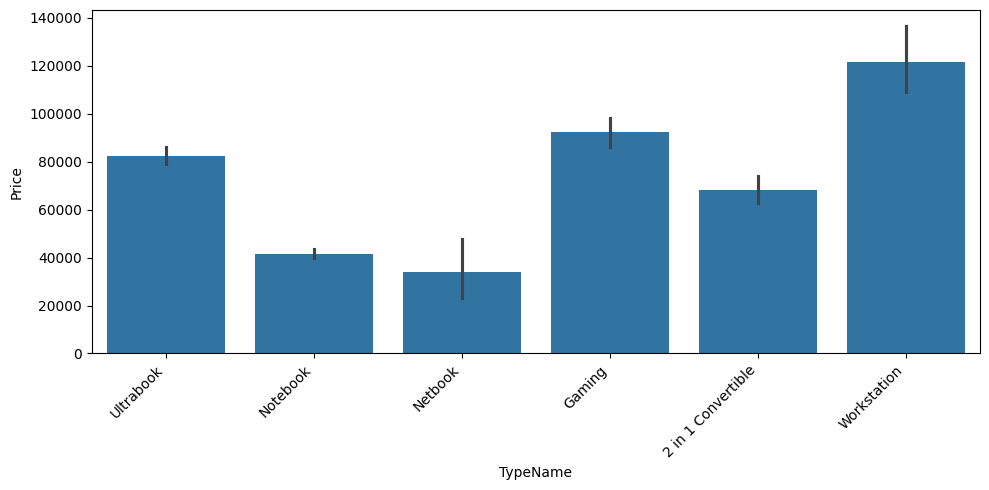

In [54]:
plt.figure(figsize = (10 , 5))
sns.barplot(x = df['TypeName'] , y = df['Price'])
plt.xticks(rotation = 45 , ha = 'right') 
plt.tight_layout()
plt.show()

In [60]:
# Doing ANOVA test to find significance 
from scipy.stats import f_oneway
groups = [df[df['TypeName'] == cat]['Price'] for cat in df['TypeName'].unique()]
f_stat, p_value = f_oneway(*groups)

if p_value < 0.05:
    print("The mean price differs significantly across TypeName.")
else:
    print("No significant difference in mean price across TypeName.")

The mean price differs significantly across TypeName.


- Price Also Varies based on Type of Laptops.
- High to Low Price Sequence: Workstation , Gamin , Ultrabook , 2 in 1 Convertible , Notebook , Netbook

### 3. How price of Laptop's varies with Size 

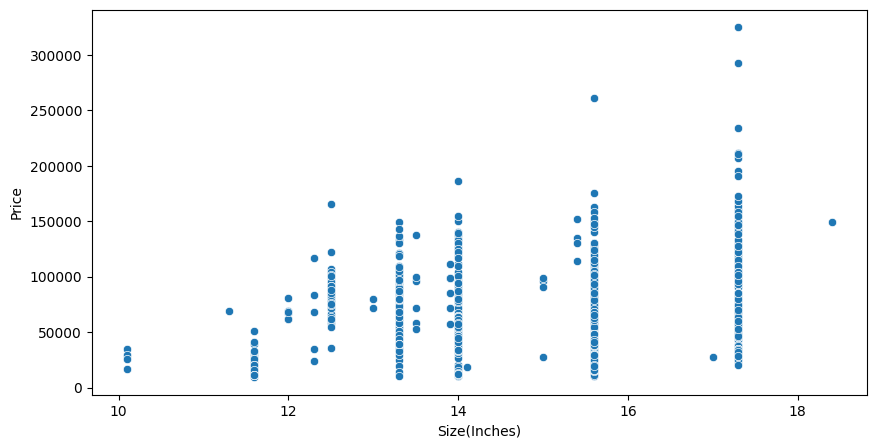

In [56]:
plt.figure(figsize = (10 , 5))
sns.scatterplot(x = df['Inches'] , y = df['Price'])
plt.xlabel("Size(Inches)")
plt.ylabel("Price")
plt.show()

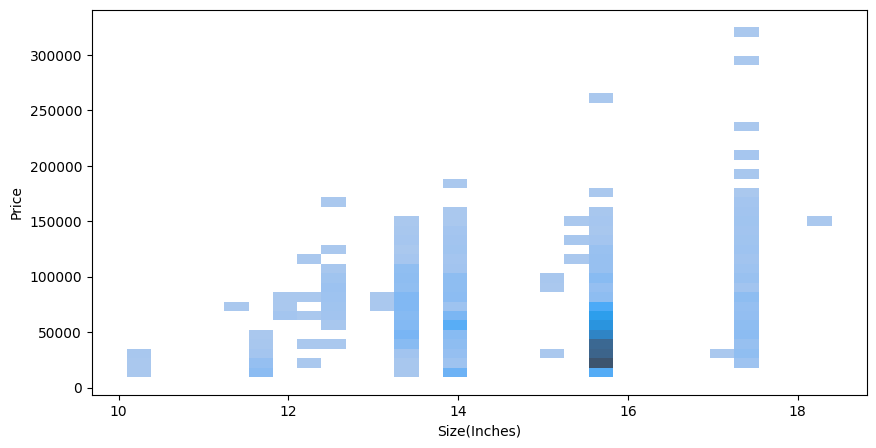

In [57]:
plt.figure(figsize = (10 , 5))
sns.histplot(x = df['Inches'] , y = df['Price'])
plt.xlabel("Size(Inches)")
plt.ylabel("Price")
plt.show()

In [59]:
from scipy.stats import pearsonr

corr , p_val = pearsonr(df['Inches'] , df['Price'])
print(f"Correlation = {corr:.3f}, p-value = {p_val:.5f}")

if p_val < 0.05:
    print("Laptop size and price are correlated.")
else:
    print("No significant correlation.")

Correlation = 0.068, p-value = 0.01381
Laptop size and price are correlated.


### 4. How Ram impacts Price

In [63]:
# Null Hypo -> No correlation 
# Alter Hypo -> Has significant correlation 
corr, p_value = pearsonr(df['Ram'] , df['Price'])

print(f"Correlation = {corr:.3f} , p-value = {p_value:.5f}")

if p_value < 0.05:
    print("Ram significantly affects Price.")
else:
    print("No significant effect.")

Correlation = 0.743 , p-value = 0.00000
Ram significantly affects Price.


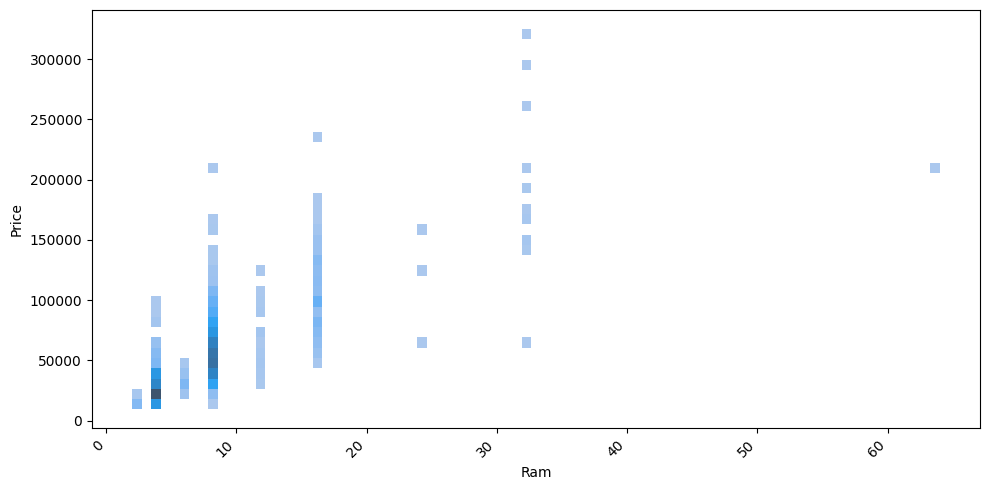

In [64]:
plt.figure(figsize = (10 , 5))
sns.histplot(x = df['Ram'] , y = df['Price'] , kde = True)
plt.xticks(rotation = 45 , ha = 'right') 
plt.tight_layout()
plt.show()

In [66]:
ram_price = df.groupby('Ram')['Price'].mean().sort_values()
ram_price

Ram
2      13552.857818
4      30613.221734
6      32778.193873
8      62913.713455
12     66037.277952
16    103191.166872
24    117553.440000
32    181849.215812
64    211788.000000
Name: Price, dtype: float64

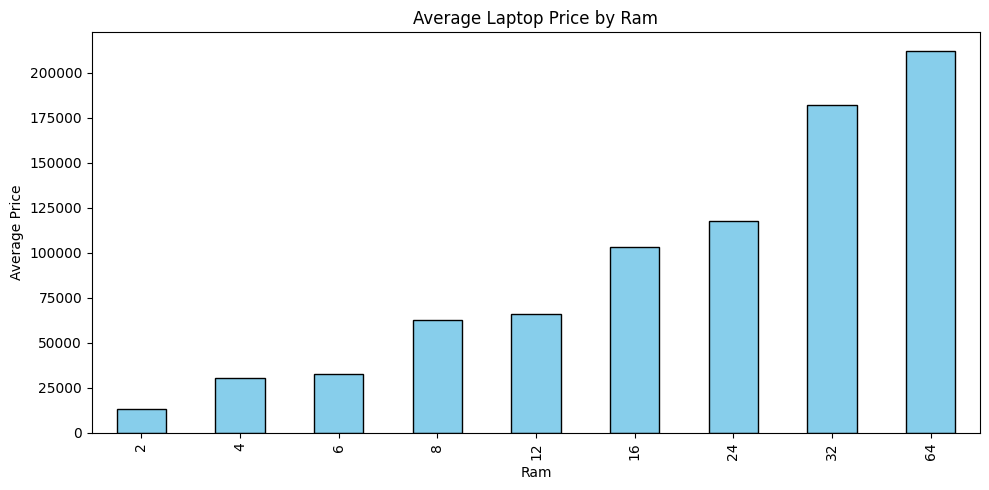

In [67]:
plt.figure(figsize = (10 , 5))
ram_price.plot(kind = 'bar', color ='skyblue', edgecolor = 'black')
plt.title("Average Laptop Price by Ram")
plt.xlabel("Ram")
plt.ylabel("Average Price")
plt.tight_layout()
plt.show()

- As Ram is increasing Price is also increasing. Which is normal.

### 5.How Weights impacts Price

In [68]:
# Null Hypo -> No correlation 
# Alter Hypo -> Has significant correlation 
corr, p_value = pearsonr(df['Weight'] , df['Price'])

print(f"Correlation = {corr:.3f} , p-value = {p_value:.5f}")

if p_value < 0.05:
    print("Weight significantly affects Price.")
else:
    print("No significant effect.")

Correlation = 0.210 , p-value = 0.00000
Weight significantly affects Price.


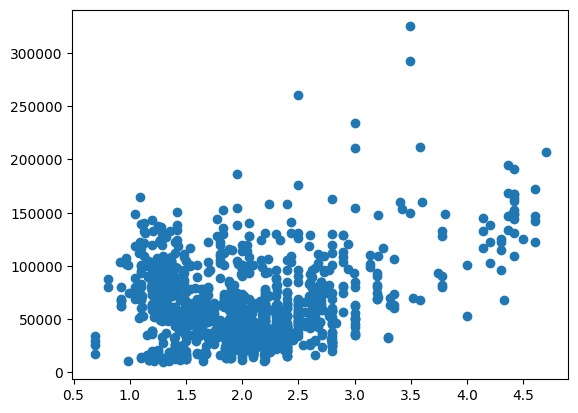

In [69]:
plt.scatter(x = df['Weight'] , y = df['Price'])
plt.show()

In [70]:
weight_price = df.groupby('Weight')['Price'].mean().sort_values()
weight_price

Weight
1.89     13157.22960
1.94     20725.92000
2.03     21471.84000
1.15     21888.31200
1.86     22610.22048
            ...     
3.60    159786.72000
3.40    159786.72000
4.36    160857.91440
4.70    207259.20000
3.49    255952.68000
Name: Price, Length: 171, dtype: float64

- Statistically significant relationship between weight and price.
- Weak positive correlation - weight alone dosn't strongly determine price.

# Feature Engineering Notebook will contain all the feature engineering and other analysis.